In [1]:
!pip install textblob

In [2]:
!pip install tweepy


In [3]:
from textblob import TextBlob

In [4]:
import sys

In [5]:
import tweepy

In [6]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [74]:
import pandas as pd

In [8]:
!pip install pandas

     |████████████████████████████████| 9.7 MB 117 kB/s eta 0:00:01     |█████████████▍                  | 4.1 MB 412 kB/s eta 0:00:14     |██████████████████▏             | 5.5 MB 457 kB/s eta 0:00:10
     |████████████████████████████████| 510 kB 338 kB/s eta 0:00:01


In [9]:
import numpy as np


In [10]:
import os

In [11]:
import nltk

In [75]:
import pycountry

In [13]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 143 kB/s eta 0:00:01    |██████████████████████████████  | 9.5 MB 229 kB/s eta 0:00:03     |███████████████████████████████▌| 10.0 MB 178 kB/s eta 0:00:01
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=dd5c838ec40fe8c12ec3b1aed6124f4652e8c9d538cade70a6fed1480a7ac777
  Stored in directory: /home/jmulagi/.cache/pip/wheels/09/eb/0d/4ee773c6a4aadc2a43cb5c1d07f268f13c4cdc0eec88e7c1ef
Successfully built pycountry


In [14]:
import re

In [15]:
import string

In [16]:
from wordcloud import WordCloud, STOPWORDS

In [17]:
from PIL import Image

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [76]:
from langdetect import detect

In [20]:
!pip install langdetect

     |████████████████████████████████| 981 kB 21 kB/s eta 0:00:01
  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=993191 sha256=ee63043629715e03acb43ecdcda1e36fd8eb582352c0e7d92fa6a3299d5f833c
  Stored in directory: /home/jmulagi/.cache/pip/wheels/1e/80/23/0a24928ec3a3906ff5027f38d2fea824e7e97f2ba7c83d91e3
Successfully built langdetect


In [21]:
import pandas as pd

In [22]:
import pycountry

In [23]:
import pycountry

In [24]:
from langdetect import detect

In [25]:
from nltk.stem import SnowballStemmer

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
!pip install sklearn

     |████████████████████████████████| 24.9 MB 119 kB/s eta 0:00:01    |▋                               | 460 kB 44 kB/s eta 0:09:15     |████████████▊                   | 9.9 MB 836 kB/s eta 0:00:18     |███████████████████████▍        | 18.2 MB 177 kB/s eta 0:00:38     |█████████████████████████▍      | 19.8 MB 1.9 MB/s eta 0:00:03
     |████████████████████████████████| 27.2 MB 22 kB/s eta 0:00:0149    |███████████████████████▊        | 20.2 MB 28 kB/s eta 0:04:05     |████████████████████████▊       | 21.1 MB 276 kB/s eta 0:00:23     |███████████████████████████▊    | 23.6 MB 80 kB/s eta 0:00:46     |████████████████████████████▊   | 24.4 MB 44 kB/s eta 0:01:05     |█████████████████████████████▋  | 25.2 MB 87 kB/s eta 0:00:24
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=1951959b04da1481f4349302f8b938cef9b42fa2a1bc72b910c2743489ffd279
  Stored in directory: /home/jmulagi/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
consumerKey = "ONo5LkX8CSnJFVzoz5csZIxUc"
consumerSecret = "qqqCtfsoupBt9C4dna3Bz0W5UsBVcHANvwwanUGKWuWRSLgxku"
accessToken = "1183387752-mFtYmxVsI5NBMWpN0HEHx97slEDGQMExxBvoDQD"
accessTokenSecret = "Tor0J1eg7HvJSNPSKZqqKY2n3trRhtpfNYmz2RqNB1BF0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [78]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: 1.4m Kenyans
Please enter how many tweets to analyze: 20


In [79]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  20
positive number:  5
negative number:  5
neutral number:  10


In [80]:
tweet_list

,0
0,RT @Kimanzi_Don: Ksh 2.5M car grants for MCAs ...
1,RT @Anita_Wangarii: 1.4M Kenyans are starving ...
2,"RT @historykenya101: In USA,farmers are 1.3% o..."
3,"RT @historykenya101: In USA,farmers are 1.3% o..."
4,RT @kidy_shoes: Nike Airmax 95 Sneakerboot ava...
5,RT @kidy_shoes: Nike Waffle sneakers available...
6,"Perfect, All Round Casual Shoes❤️.\n🤑Available..."
7,RT @Lastepisode9: CAR AIR-CONDITIONER REFILLIN...
8,RT @Magic2Girl: With @VochaLtd unabuy credit f...
9,RT @Cont_roversial: Would you rather live in N...


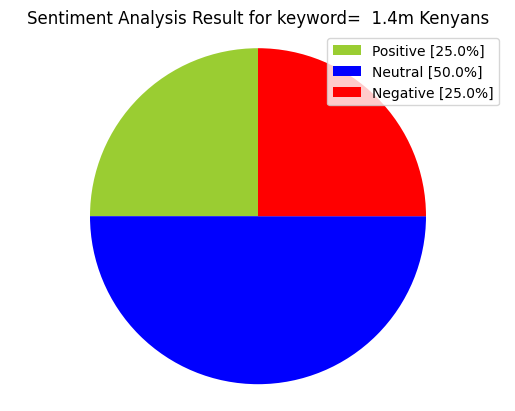

In [81]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [82]:
tweet_list.drop_duplicates(inplace = True)

In [83]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @Kimanzi_Don: Ksh 2.5M car grants for MCAs ...,RT @Kimanzi_Don: Ksh 2.5M car grants for MCAs ...
1,RT @Anita_Wangarii: 1.4M Kenyans are starving ...,RT @Anita_Wangarii: 1.4M Kenyans are starving ...
2,"RT @historykenya101: In USA,farmers are 1.3% o...","RT @historykenya101: In USA,farmers are 1.3% o..."
4,RT @kidy_shoes: Nike Airmax 95 Sneakerboot ava...,RT @kidy_shoes: Nike Airmax 95 Sneakerboot ava...
5,RT @kidy_shoes: Nike Waffle sneakers available...,RT @kidy_shoes: Nike Waffle sneakers available...
6,"Perfect, All Round Casual Shoes❤️.\n🤑Available...","Perfect, All Round Casual Shoes❤️.\n🤑Available..."
7,RT @Lastepisode9: CAR AIR-CONDITIONER REFILLIN...,RT @Lastepisode9: CAR AIR-CONDITIONER REFILLIN...
8,RT @Magic2Girl: With @VochaLtd unabuy credit f...,RT @Magic2Girl: With @VochaLtd unabuy credit f...
9,RT @Cont_roversial: Would you rather live in N...,RT @Cont_roversial: Would you rather live in N...
10,RT @NationBreaking: GOVERNMENT SPOKESMAN Cyrus...,RT @NationBreaking: GOVERNMENT SPOKESMAN Cyrus...


In [84]:
tweet_list

,0,text
0,RT @Kimanzi_Don: Ksh 2.5M car grants for MCAs ...,RT @Kimanzi_Don: Ksh 2.5M car grants for MCAs ...
1,RT @Anita_Wangarii: 1.4M Kenyans are starving ...,RT @Anita_Wangarii: 1.4M Kenyans are starving ...
2,"RT @historykenya101: In USA,farmers are 1.3% o...","RT @historykenya101: In USA,farmers are 1.3% o..."
4,RT @kidy_shoes: Nike Airmax 95 Sneakerboot ava...,RT @kidy_shoes: Nike Airmax 95 Sneakerboot ava...
5,RT @kidy_shoes: Nike Waffle sneakers available...,RT @kidy_shoes: Nike Waffle sneakers available...
6,"Perfect, All Round Casual Shoes❤️.\n🤑Available...","Perfect, All Round Casual Shoes❤️.\n🤑Available..."
7,RT @Lastepisode9: CAR AIR-CONDITIONER REFILLIN...,RT @Lastepisode9: CAR AIR-CONDITIONER REFILLIN...
8,RT @Magic2Girl: With @VochaLtd unabuy credit f...,RT @Magic2Girl: With @VochaLtd unabuy credit f...
9,RT @Cont_roversial: Would you rather live in N...,RT @Cont_roversial: Would you rather live in N...
10,RT @NationBreaking: GOVERNMENT SPOKESMAN Cyrus...,RT @NationBreaking: GOVERNMENT SPOKESMAN Cyrus...


In [85]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @Kimanzi_Don: Ksh 2.5M car grants for MCAs ...,ksh 2 5m car grants for mcas but no money to ...
1,RT @Anita_Wangarii: 1.4M Kenyans are starving ...,1 4m kenyans are starving which is not the co...
2,"RT @historykenya101: In USA,farmers are 1.3% o...",in usa farmers are 1 3 of the population in ...
4,RT @kidy_shoes: Nike Airmax 95 Sneakerboot ava...,nike airmax 95 sneakerboot available sizes 4...
5,RT @kidy_shoes: Nike Waffle sneakers available...,nike waffle sneakers available sizes 40 45 k...
6,"Perfect, All Round Casual Shoes❤️.\n🤑Available...",perfect all round casual shoes available ...
7,RT @Lastepisode9: CAR AIR-CONDITIONER REFILLIN...,car air conditioner refilling we come to yo...
8,RT @Magic2Girl: With @VochaLtd unabuy credit f...,with unabuy credit free bila kukatwa any tr...
9,RT @Cont_roversial: Would you rather live in N...,would you rather live in ngong or lavington ...
10,RT @NationBreaking: GOVERNMENT SPOKESMAN Cyrus...,government spokesman cyrus oguna says about 1...


In [86]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(50)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @Kimanzi_Don: Ksh 2.5M car grants for MCAs ...,ksh 2 5m car grants for mcas but no money to ...,-0.400000,0.600000,negative,0.306,0.647,0.047,-0.8402
1,RT @Anita_Wangarii: 1.4M Kenyans are starving ...,1 4m kenyans are starving which is not the co...,0.350000,0.550000,negative,0.123,0.793,0.084,-0.2263
2,"RT @historykenya101: In USA,farmers are 1.3% o...",in usa farmers are 1 3 of the population in ...,-0.166667,0.066667,neutral,0.000,1.000,0.000,0.0000
4,RT @kidy_shoes: Nike Airmax 95 Sneakerboot ava...,nike airmax 95 sneakerboot available sizes 4...,0.400000,0.400000,neutral,0.000,1.000,0.000,0.0000
5,RT @kidy_shoes: Nike Waffle sneakers available...,nike waffle sneakers available sizes 40 45 k...,0.400000,0.400000,neutral,0.000,1.000,0.000,0.0000
6,"Perfect, All Round Casual Shoes❤️.\n🤑Available...",perfect all round casual shoes available ...,0.175000,0.666667,positive,0.000,0.686,0.314,0.6705
7,RT @Lastepisode9: CAR AIR-CONDITIONER REFILLIN...,car air conditioner refilling we come to yo...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,RT @Magic2Girl: With @VochaLtd unabuy credit f...,with unabuy credit free bila kukatwa any tr...,0.400000,0.800000,positive,0.000,0.731,0.269,0.7096
9,RT @Cont_roversial: Would you rather live in N...,would you rather live in ngong or lavington ...,0.136364,0.500000,neutral,0.000,1.000,0.000,0.0000
10,RT @NationBreaking: GOVERNMENT SPOKESMAN Cyrus...,government spokesman cyrus oguna says about 1...,-0.050000,0.700000,negative,0.104,0.829,0.067,-0.1779


In [87]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [88]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [51]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,213,45.32
neutral,158,33.62
negative,99,21.06


In [91]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


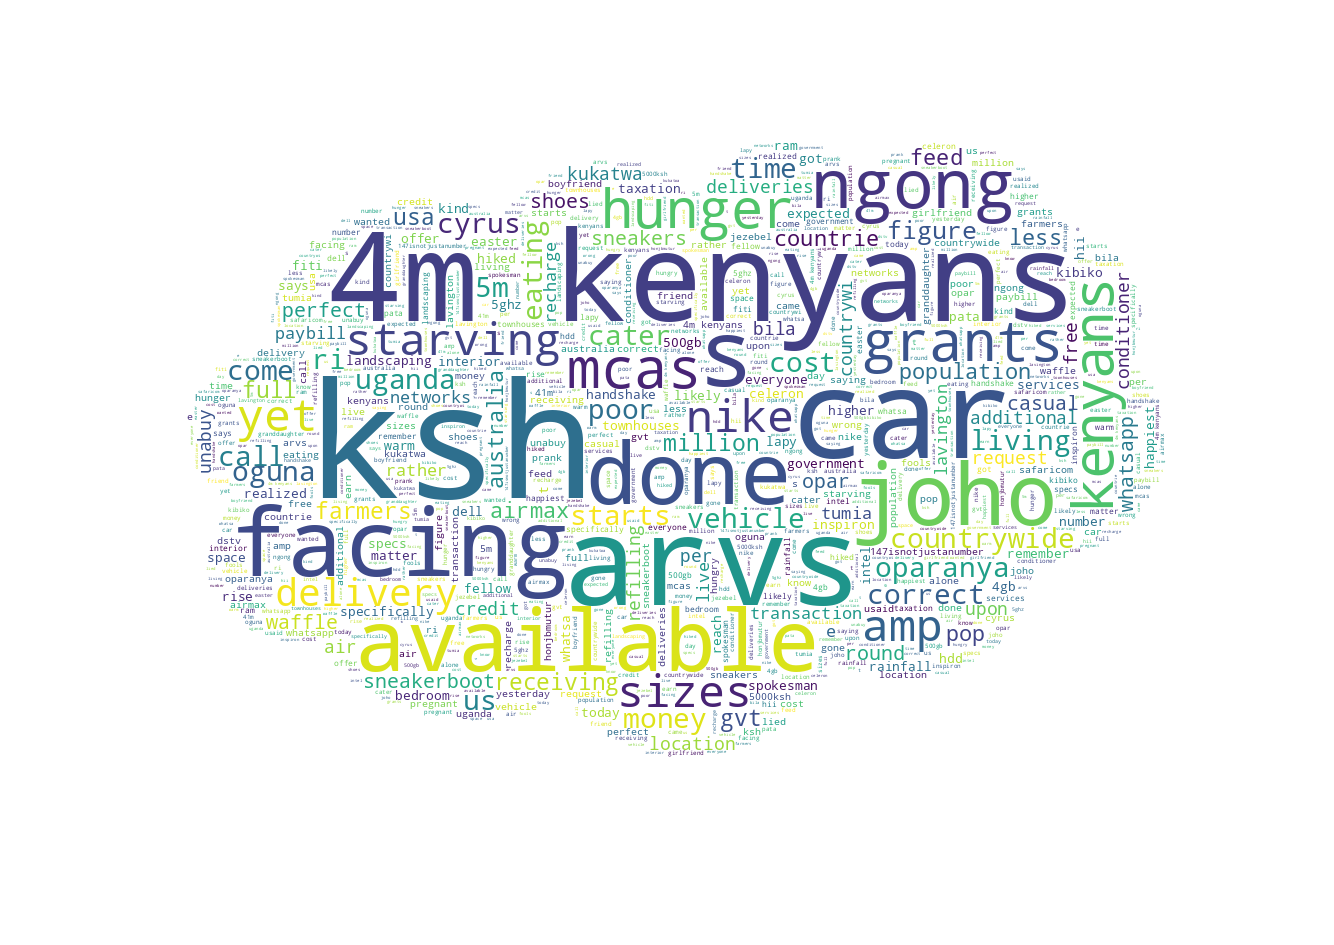

In [92]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

In [93]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [94]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,120.80
neutral,123.57
positive,118.20


In [95]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,22.20
neutral,21.14
positive,18.00


In [96]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [97]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [63]:
import nltk

In [64]:
>>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jmulagi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [98]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [99]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [100]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [101]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @Kimanzi_Don: Ksh 2.5M car grants for MCAs ...,ksh 2 5m car grants for mcas but no money to ...,-0.400000,0.600000,negative,0.306,0.647,0.047,-0.8402,124,27,ksh m car grants for mcas but no money to ca...,"[, ksh, m, car, grants, for, mcas, but, no, mo...","[, ksh, car, grants, mcas, money, cater, kenya...","[, ksh, car, grant, mca, money, cater, kenyan,..."
1,RT @Anita_Wangarii: 1.4M Kenyans are starving ...,1 4m kenyans are starving which is not the co...,0.350000,0.550000,negative,0.123,0.793,0.084,-0.2263,120,22,m kenyans are starving which is not the corr...,"[, m, kenyans, are, starving, which, is, not, ...","[, kenyans, starving, correct, figure, mcas, r...","[, kenyan, starv, correct, figur, mca, receiv,..."
2,"RT @historykenya101: In USA,farmers are 1.3% o...",in usa farmers are 1 3 of the population in ...,-0.166667,0.066667,neutral,0.000,1.000,0.000,0.0000,124,25,in usa farmers are of the population in au...,"[, in, usa, farmers, are, of, the, population,...","[, usa, farmers, population, australia, less, ...","[, usa, farmer, popul, australia, less, pop, a..."
4,RT @kidy_shoes: Nike Airmax 95 Sneakerboot ava...,nike airmax 95 sneakerboot available sizes 4...,0.400000,0.400000,neutral,0.000,1.000,0.000,0.0000,125,19,nike airmax sneakerboot available sizes k...,"[, nike, airmax, sneakerboot, available, sizes...","[, nike, airmax, sneakerboot, available, sizes...","[, nike, airmax, sneakerboot, avail, size, ksh..."
5,RT @kidy_shoes: Nike Waffle sneakers available...,nike waffle sneakers available sizes 40 45 k...,0.400000,0.400000,neutral,0.000,1.000,0.000,0.0000,125,18,nike waffle sneakers available sizes ksh ...,"[, nike, waffle, sneakers, available, sizes, k...","[, nike, waffle, sneakers, available, sizes, k...","[, nike, waffl, sneaker, avail, size, ksh, del..."


In [102]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

17 Number of reviews has 155 words


In [103]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,addit,air,airmax,alon,amp,arv,australia,avail,bedroom,...,vehicl,waffl,want,warm,whatsa,whatsapp,would,wrong,yesterday,yet
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [71]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]


,0
joho,266
oparanya,249
raila,156
odm,149
presidenti,86
parti,56
odinga,50
ksh,49
us,42
elect,38


In [104]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [105]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('4m kenyans', 5),
 ('kenyans facing', 3),
 ('arvs joho', 3),
 ('car grants', 2),
 ('facing hunger', 2),
 ('kenyans starving', 2),
 ('available sizes', 2),
 ('sizes 40', 2),
 ('40 45', 2),
 ('45 ksh', 2),
 ('delivery countrywide', 2),
 ('countrywide 0710356282', 2),
 ('0710356282 uganda', 2),
 ('uganda arvs', 2),
 ('joho oparanya', 2),
 ('cyrus oguna', 2),
 ('ksh 5m', 1),
 ('5m car', 1),
 ('grants mcas', 1),
 ('mcas money', 1)]